# <font color=purple>  Taller de cosmología con SimpleMC </font>

## Día 2
===========

### Plan del día:

 - Breve recordatorio y graficación de resultados
 - Comparación de constricciones de parámetros entre diferentes observaciones
 - Agregar datos
 - Comparación de modelos  

## Recordatorio 

### La clase DriverMC
 - Es la clase principal, conecta todos los modulos y clases de SimpleMC.
 - Se le puede dar como argumento un \texttt{inifile.ini} con toda la configuración deseada, o bien, escribir los parámetros de la función con los valores deseados. 
 - Si se omite un valor, se usarán valores por default (salvo en el modelo).
 
## La clase Parameter

 - Parameter("name", mean, err, (binf, bsup), "$\LaTeX$name")


### Agregar modelo no cosmológico con la clase SimpleModel
(El ejemplo de ayer que tenía un error.)
  1. Definir parámetros con la clase Parameter
  2. Hacer una lista con los objetos Parameter creados.
  3. Definir un método que reciba un vector x y una lista de parámetros, descomprima la lista y regrese la f(x).
  4. Usar DriverMC con los siguientes argumentos:
   * model = custom_model
   * custom_parameters = tuListaDeParametros
   * custom_function = tuFuncionCreada


In [1]:
from simplemc.models.SimpleModel import SimpleModel
from simplemc.cosmo.Parameter import Parameter
from simplemc.DriverMC import DriverMC
%matplotlib

Hello, World! I am process 0 of 1 on ubik
Initalizing nu density look up table... Done
Using matplotlib backend: GTK3Agg


In [2]:
### This scripts create a generic model (without cosmology)
### with the SimpleModel class.

# 1) Define your parameters objects
# name string,  value intermediate, step size,
# (bound_inf, bound_sup),  LaTeX name
m = Parameter("m", 3, 0.5, (0,5), "m_0")
b = Parameter("b", 3, 0.5, (0,5), "b_0")
# 2) Create a list with your parameters objects
parameterlist = [m, b]

In [3]:
# 3) Define a method that reads a list of parameters,
# unzip them and return the a function of x with the
# parameters.
def model(parameterlist, x):
    m, b = parameterlist
    return m*x+b

In [4]:
# 4) Use SimpleMC as usually, but with model = custom_model
analyzer = DriverMC(model='custom', datasets='dline', analyzername='mcmc',
                    custom_parameters=parameterlist, custom_function=model)


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/isidro/.local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/isidro/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/ho

In [5]:
analyzer.executer(nsamp=1000)

INFO:simplemc:
	nsamp: 1000
	skip: 300
	temp: 2
	chain num: 1
	evidence: False


Bounds: [0 0] [5 5]
Starting chain...
Accepted: 299 | loglike: -331039.2184 | GR: None
Re-initializing covariance matrix after burn-in
[[ 0.05717106 -0.02612726]
 [-0.02612726  0.37586335]]



True

Plotting with Corner!


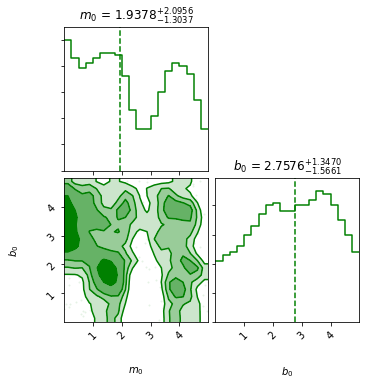

In [6]:
f = analyzer.plot(show=True)
f.simpleCorner()

## Agregar un modelo cosmológico:

 * Por simplicidad, se recomienda modificar la clase simpleCosmoModel.
 * En DriverMC el model="simpleCosmo"

In [7]:
analyzer = DriverMC(model='simpleCosmo', datasets='HD', 
                    analyzername='mcmc')

Loading  simplemc/data/HDiagramCompilacion-data_31.txt
Loading  simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05
Ok = 0.0 +/- 0.01
w = -1.0 +/- 0.1
wa = 0.0 +/- 0.1


In [8]:
analyzer.executer(nsamp=1000, skip=0)

INFO:simplemc:
	nsamp: 1000
	skip: 0
	temp: 2
	chain num: 1
	evidence: False


Bounds: [ 0.05  0.02  0.4  -0.1  -2.   -2.  ] [0.5   0.025 1.    0.1   0.    2.   ]
Starting chain...


True

Plotting with Corner!


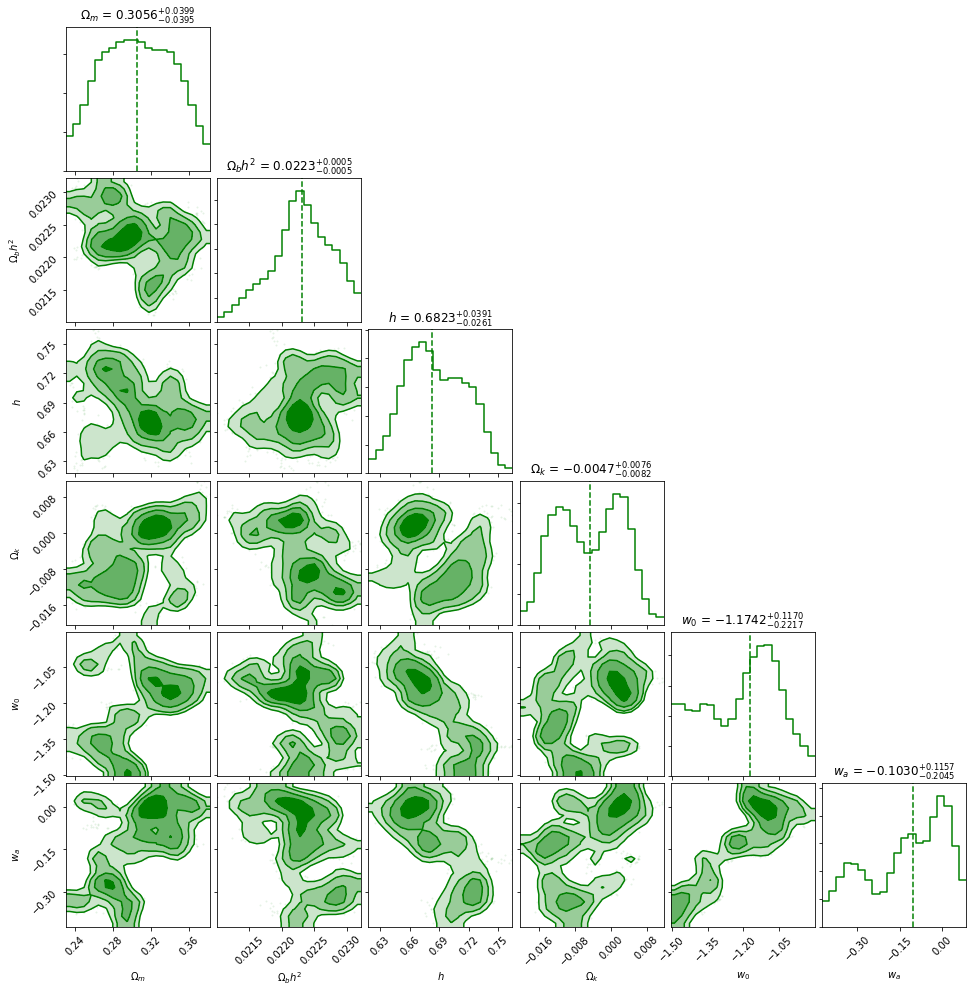

In [9]:
f = analyzer.plot(show=True)
f.simpleCorner()

### Las salidas de SimpleMC puede graficar con:
   
   * **` Corner `** . *Foreman-Mackey, D. (2016). corner. py: Scatterplot matrices in Python. The Journal of Open Source Software, 1.*
    
   * **`Getdist`**. *Bocquet, S., & Carter, F. (2016). pygtc: beautiful parameter covariance plots (aka. Giant Triangle Confusograms). Journal of Open Source Software, 1(6), 46.*
   
   * **`fgivenx`**. *Handley, W. (2019). fgivenx: A Python package for functional posterior plotting. arXiv preprint arXiv:1908.01711.*
   
   * Propias.
   
#### Ejemplo:

  Generar una cadena y graficarla con las diferentes opciones.


In [10]:
from simplemc.DriverMC import DriverMC

In [11]:
analyzer = DriverMC(analyzername="mcmc", model="LCDM", 
                    chainsdir='chains', datasets="HD")

Loading  simplemc/data/HDiagramCompilacion-data_31.txt
Loading  simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05


In [12]:
analyzer.executer(nsamp=1000, skip=0)

INFO:simplemc:
	nsamp: 1000
	skip: 0
	temp: 2
	chain num: 1
	evidence: False


Bounds: [0.05 0.02 0.4 ] [0.5   0.025 1.   ]
Starting chain...


True

In [13]:
fig = analyzer.plot()

**kwargs de Corner y valores por default:**
- color =  'g'
- show_titles = True
- fill_contours =  True
- bins = 20
- smooth1d =True
- smooth = True
- plot_contours = True
- plot_density = True
- truths = None
- label = None

Plotting with Corner!


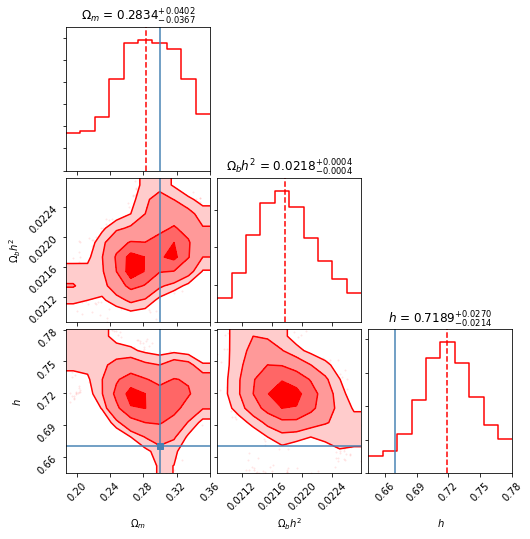

In [14]:
## Corner:
fig.simpleCorner(color='r', truths=[0.3, 0.02, 0.67], 
                 bins=10)

**kwargs de Getdist y valores por default:**
    
- smooth2d = 0.3
- smooth1d = 0.3
- burnin =  0.2
- colors =  ['red', 'blue', 'black', 'green', 'yellow', 'purple', 'gray']
- legend_labels = []
- filled = False
- normalized = False
- shaded =  False
- label = None
- roots = [self.root]


/home/isidro/CosmoMC/python/getdist/plots.py:11: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('Agg', warn=False)


chains/LCDM_phy_HD_mcmc_1.txt
Removed 0.2 as burn in


<Figure size 720x648 with 0 Axes>

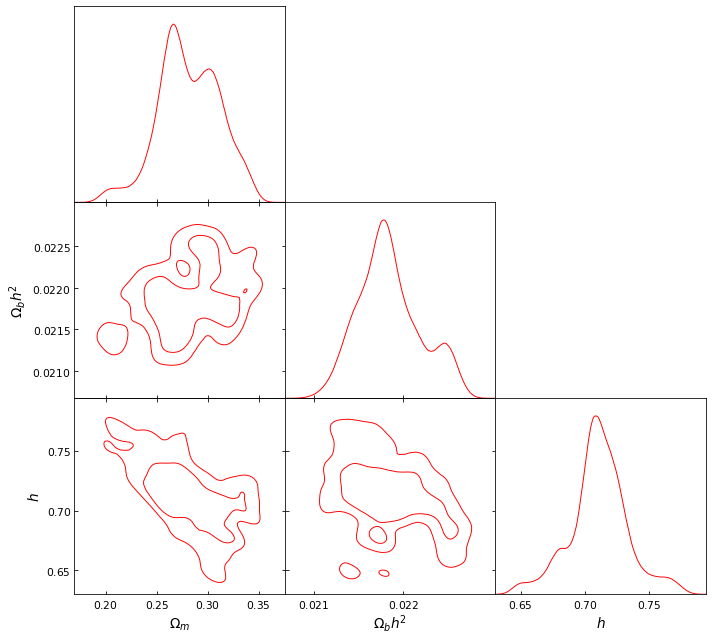

In [15]:
fig.simpleGetdist()

**kwargs de fgivenx y valores por default:**

- params = ['Om', 'h']
- z = np.linspace(0, 4, 100)
- func = Hzfunc
- label = ['z', 'H(z)']
- interval = [0, 4]
- colorcolors = plt.get_cmap('Greens')
- line_widths = 0.8

**Función Hzfunc (default de func):**

```
        def Hzfunc(self, z, theta1):
            Omega_m, h = theta1
            Hz = 100*h*(Omega_m*(1+z)**3 +(1-Omega_m))**0.5
            return Hz
```

chains/LCDM_phy_HD_mcmc_1.txt
Removed 0.3 as burn in


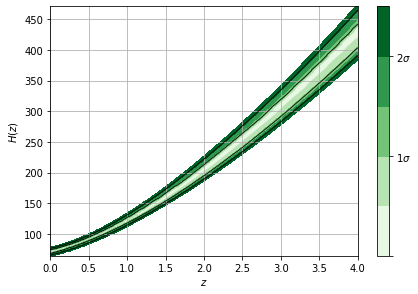

In [16]:
fig.simpleFgivenx()

**kwargs de simplePlot y valores por default:**
*Por el momento solo para cadenas mcmc*

    - type = 'triangle')
    - roots = [self.root])
    # parlist is a par for 2d
    # list of paramnames for triangle
    # one or more for 1d
    - pars2d = [['Om', 'h']]
    - pars1d =['Om', 'h']
    - parstriangle = ['Om', 'Obh2', 'h']
    - label = [""])
    - colors = ['red', 'blue', 'green', 'orange']
    # 1d
    - smooth1d = 2
    - normpeak1d = True
    # 2d
    - pbest2d = True
    - solid2d = True
    # triangle
    - colortriangle = "blue"



0 Om
1 Obh2
2 h
3 HD_like
4 theory_prior
Got  5 parameters.
Reading chains/LCDM_phy_HD_mcmc_1.txt ... skipping: 20
balancing...


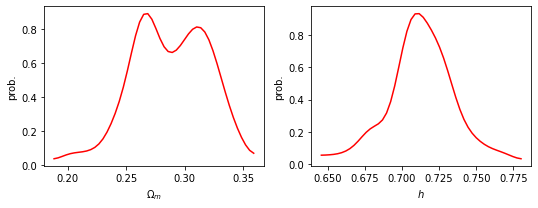

In [17]:
fig.simplePlot(type="1d")

/home/isidro/SimpleMC/simplemc/tools/cosmich.py:324: UserWarning: The following kwargs were not used by contour: 'aspect'
  aspect='auto', colors=filled, linewidths=lw)
/home/isidro/SimpleMC/simplemc/tools/cosmich.py:330: UserWarning: The following kwargs were not used by contour: 'aspect'
  aspect='auto', cmap=plt.get_cmap(mcolor[filled]))


0 Om
1 Obh2
2 h
3 HD_like
4 theory_prior
Got  5 parameters.
Reading chains/LCDM_phy_HD_mcmc_1.txt ... skipping: 20
balancing...
[0.68, 0.95] False
contours 1.3858206689057226 0.5599560376682176 0
lw= 2


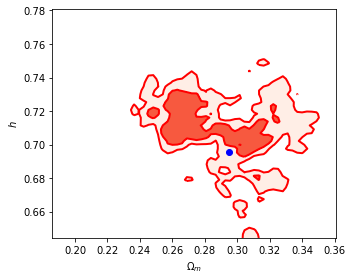

In [18]:
fig.simplePlot(type="2d")

0 Om
1 Obh2
2 h
3 HD_like
4 theory_prior
Got  5 parameters.
Reading chains/LCDM_phy_HD_mcmc_1.txt ... skipping: 20
balancing...
[0.68, 0.95] False
contours 1.370921962655519 0.5582528221059322 0
[0.68, 0.95] False
contours 1.3858206689057226 0.5599560376682176 0
[0.68, 0.95] False
contours 1.3262045802898978 0.5168050749416523 0


/home/isidro/SimpleMC/simplemc/tools/cosmich.py:427: UserWarning: The following kwargs were not used by contour: 'aspect'
  aspect='auto', colors='blue', linewidths=1)
/home/isidro/SimpleMC/simplemc/tools/cosmich.py:429: UserWarning: The following kwargs were not used by contour: 'aspect'
  aspect='auto', cmap=plt.get_cmap('Blues'))
/home/isidro/SimpleMC/simplemc/tools/cosmich.py:427: UserWarning: The following kwargs were not used by contour: 'aspect'
  aspect='auto', colors='blue', linewidths=1)
/home/isidro/SimpleMC/simplemc/tools/cosmich.py:429: UserWarning: The following kwargs were not used by contour: 'aspect'
  aspect='auto', cmap=plt.get_cmap('Blues'))


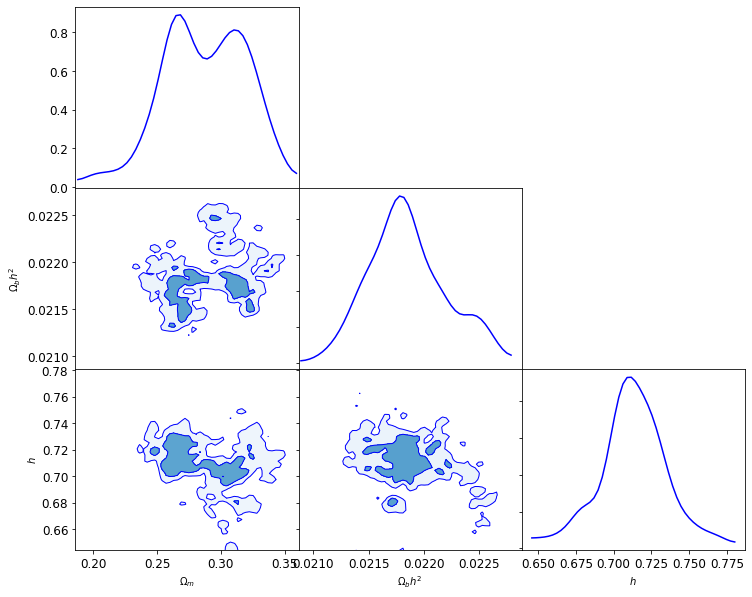

In [19]:
fig.simplePlot(type="triangle")

## Comparación de observaciones

<img src="tallerSimpleMC/samplersTriangleowaCDM.png">

`Ejemplo:`

Generar varias cadenas de un mismo modelo con diferentes observaciones.

In [1]:
from simplemc.DriverMC import DriverMC
a = DriverMC(model="owaCDM", datasets="HD", analyzername="mcmc",
                      chainsdir='chains')

Hello, World! I am process 0 of 1 on ubik
Initalizing nu density look up table... Done
Loading  simplemc/data/HDiagramCompilacion-data_31.txt
Loading  simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05
w = -1.0 +/- 0.1
wa = 0.0 +/- 0.1
Ok = 0.0 +/- 0.01


In [2]:
#a.executer(nlivepoints=20, accuracy=0.9)
a.executer(nsamp=1000, skip=0)

INFO:simplemc:
	nsamp: 1000
	skip: 0
	temp: 2
	chain num: 1
	evidence: False


Bounds: [ 0.05  0.02  0.4  -2.   -2.   -0.1 ] [0.5   0.025 1.    0.    2.    0.1  ]
Starting chain...
Accepted: 1000 | loglike: -7.3495 | GR: [1.05550500e-01 6.47423248e-03 1.28595888e-06 1.67131941e+00654708]
Accepted: 1001 | loglike: -7.5775 | GR: [1.05550500e-01 6.47423248e-03 1.28595888e-06 1.67131941e+00


True

In [3]:
b = DriverMC(model="owaCDM", datasets="HD+BBAO", analyzername="mcmc",
                      chainsdir='chains')
b.executer(nsamp=1000, skip=0)

Loading  simplemc/data/HDiagramCompilacion-data_31.txt
Loading  simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
DR11LOWZ measurement in  Cuesta : 8.468173048634462 +- 0.16748759985432085

Loading  simplemc/data/sdss_DR11CMASS_consensus.dat
Aperp min,max,step,N: 0.961142836 1.12057144 0.0005714290000000677 280
Aparl min,max,step,N: 0.85171431 1.09085718 0.0008571430000000602 280


/home/isidro/SimpleMC/simplemc/likelihoods/TabulatedBAODVLikelihood.py:25: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rms /= quad(lambda x: sp.exp(-self.chi2i(alphamin+x)/2), -0.1, 0.1)[0]
INFO:simplemc:
	nsamp: 1000
	skip: 0
	temp: 2
	chain num: 1
	evidence: False


Loading done
rd =  149.26478152260088  Mpc
Fiducials at z= 0.57 : 14.3015431061137 21.466392296218515

Loading  simplemc/data/chi2_surface_dr11_baseline_fit.txt
Aperp min,max,step,N: 0.5 1.5 0.016666999999999987 61
Aparl min,max,step,N: 0.8 1.2 0.0066669999999999785 61
Loading done
rd =  149.73834899440558  Mpc
Fiducials at z= 2.34 : 38.71393250862439 8.704556344366967

Loading  simplemc/data/lyabaocross.scan
Aperp min,max,step,N: 0.7 1.3 0.020000000000000018 31
Aparl min,max,step,N: 0.8 1.2 0.010000000000000009 41
Loading done
rd =  149.56742181392625  Mpc
Fiducials at z= 2.36 : 38.931124520156345 8.641577445046805
SixdFGS measurement in  Cuesta : 3.041334103142206 +- 0.18007899294920957

Loading  simplemc/data/chidavexi8stavePk5staverec.dat
MGS measurement in Cuesta  : DV= 664.1865351303804 +- 24.86880740958958
with rd= 148.6516589371155 DV_fid= 638.9490468680368 alphamin= 1.0394984363558428
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05
w = -1.0 +

True

In [4]:
roots = ['owaCDM_phy_HD_mcmc' , 'owaCDM_phy_HD+BBAO_mcmc']
fig = a.plot(show=True)

In [5]:
fig.simpleGetdist(roots=roots)

/home/isidro/CosmoMC/python/getdist/plots.py:11: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('Agg', warn=False)


chains/owaCDM_phy_HD_mcmc_1.txt
Removed 0.2 as burn in
chains/owaCDM_phy_HD+BBAO_mcmc_1.txt
Removed 0.2 as burn in


## Agregar datos

### Revisar la clase SimpleLikelihood

```
    class SimpleLikelihood (BaseLikelihood):
        def __init__(self, name, values_filename, cov_filename):
            BaseLikelihood.__init__(self, name)
            # print("Loading ", values_filename)
            logger.info("Loading ", values_filename)
            data = sp.loadtxt(values_filename)
            self.xx  = data[:,0]
            self.yy  = data[:,1]
            self.cov = sp.loadtxt(cov_filename,skiprows=0)
            assert(len(self.cov) == len(self.xx))
            self.icov = la.inv(self.cov)

        def loglike(self):
            #delta is the difference between theory and data
            tvec  = sp.array([self.theory_.genericModel(z) for z in self.xx])

            delta = self.yy - tvec
            return -0.5*sp.dot(delta, sp.dot(self.icov, delta))



class StraightLine(SimpleLikelihood):
   def __init__(self):  
     SimpleLikelihood.__init__(self,"GenericData","line_data.txt", "line_cov.txt")

class GenericLikelihood(SimpleLikelihood):
    def __init__(self, path_to_data, path_to_cov):
        SimpleLikelihood.__init__(self, "GenericData", path_to_data, path_to_cov)

```

In [1]:
from simplemc.DriverMC import DriverMC


Hello, World! I am process 0 of 1 on ubik
Initalizing nu density look up table... Done


In [2]:
pathdata = "/home/isidro/SimpleMC/HDiagramCompilacion-data_31.txt"
pathcov = "/home/isidro/SimpleMC/HDiagramCompilacion-cov_31.txt"


In [3]:
a = DriverMC(model="sline", datasets="custom", analyzername="mcmc",
             path_to_data=pathdata, path_to_cov=pathcov)


Free parameters and values currently accepted:
a = 0.0 +/- 0.5
b = 0.0 +/- 0.5


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/isidro/.local/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/isidro/.local/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/ho

In [4]:
a.executer(nsamp=1000, skip=0)

INFO:simplemc:
	nsamp: 1000
	skip: 0
	temp: 2
	chain num: 1
	evidence: False
INFO:simplemc:simplemc/chains/sline_phy_custom_mcmc_9 file already exists, simplemc/chains/sline_phy_custom_mcmc_new was created


Bounds: [-10. -10.] [10. 10.]
Starting chain...


True

Plotting with Corner!


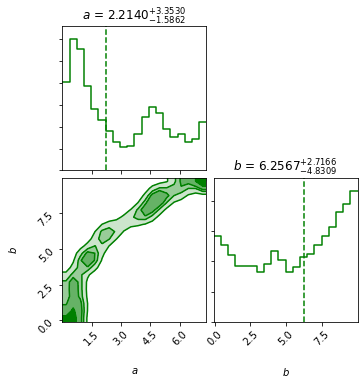

In [5]:
fig = a.plot(show=True)
fig.simpleCorner()